# Week 1

## Useful functions

In [1]:
from explore_then_commit import *
from thompson_sampling import *

# libraries to import
import numpy as np
import matplotlib.pyplot as plt

# Week 3

## Goals and Objectives

- The success probability of explore-then-commit algo, as a function of sub-optimality gap and exploration time. Of course, this is also averaged over 50-100 runs.

## Setup

In [2]:
#Initialisation of general parameters for the Explore then Commit strategy of the Multi-Armed Bandit problem

# Total number of arms
N_ARMS = 5

# exploration time
T_EXPLORATION = 5000

# divide T_exploration in 100 values and fill array of exploration times
T_EXPLORATION_ARRAY = np.linspace(0, T_EXPLORATION, 101, endpoint= True, dtype=int) 

# print the array of exploration times
print("Values of T_EXPLORATION: " + str(T_EXPLORATION_ARRAY))


# reward for a win
REWARD = 1

# sub-optimality gap
GAPS = [0.01, 0.02, 0.1, 0.2, 0.5]

# Array of list of arms Probabilities repartitions
array_probs = []

# Probability repartition with sub-optimality gap
for gap in GAPS:

    # probability of success for the second best arm as a random number between 0 and 0.5
    p_second_best = np.random.rand() * (1 - gap)

    # probability of success for the best arm
    p_best = p_second_best + gap

    # calculate the other arm probabilities as random between 0 and p_second_best
    probs = np.random.rand(N_ARMS - 2) * p_second_best

    # add the best and second best arm probabilities
    probs = np.append(probs, [p_best, p_second_best])

    # shuffle the probabilities and add them to the list
    np.random.shuffle(probs)
    array_probs.append(probs)





Values of T_EXPLORATION: [   0   50  100  150  200  250  300  350  400  450  500  550  600  650
  700  750  800  850  900  950 1000 1050 1100 1150 1200 1250 1300 1350
 1400 1450 1500 1550 1600 1650 1700 1750 1800 1850 1900 1950 2000 2050
 2100 2150 2200 2250 2300 2350 2400 2450 2500 2550 2600 2650 2700 2750
 2800 2850 2900 2950 3000 3050 3100 3150 3200 3250 3300 3350 3400 3450
 3500 3550 3600 3650 3700 3750 3800 3850 3900 3950 4000 4050 4100 4150
 4200 4250 4300 4350 4400 4450 4500 4550 4600 4650 4700 4750 4800 4850
 4900 4950 5000]


Gap: 0.01, Probs: [0.84715936 0.64151369 0.68455036 0.83715936 0.81371044]
Gap: 0.02, Probs: [0.65261115 0.55328403 0.82176305 0.84176305 0.21249143]
Gap: 0.1, Probs: [0.08611867 0.04189765 0.02409124 0.05815026 0.18611867]
Gap: 0.2, Probs: [0.44388722 0.17599269 0.14546029 0.24388722 0.18120082]
Gap: 0.5, Probs: [0.10516872 0.05772823 0.76153351 0.26153351 0.07192445]


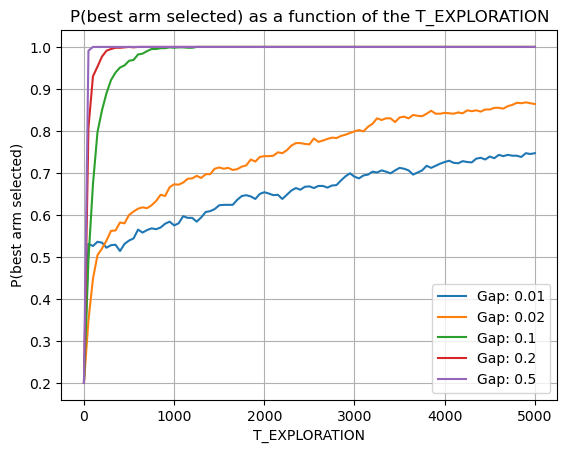

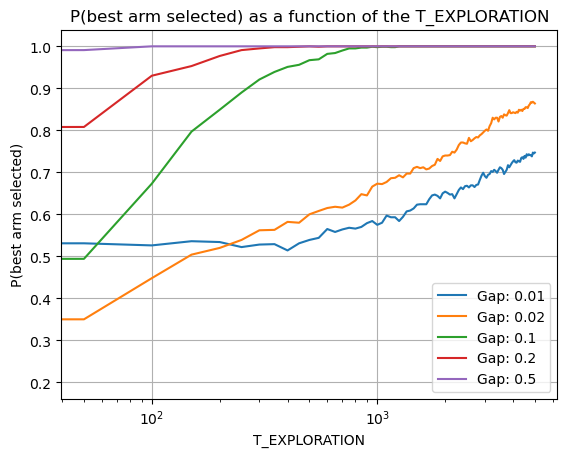

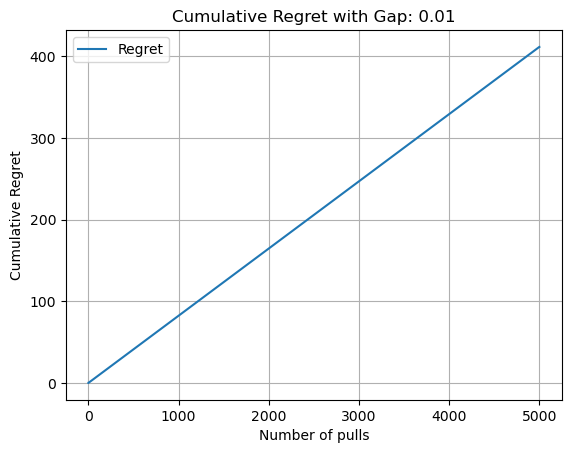

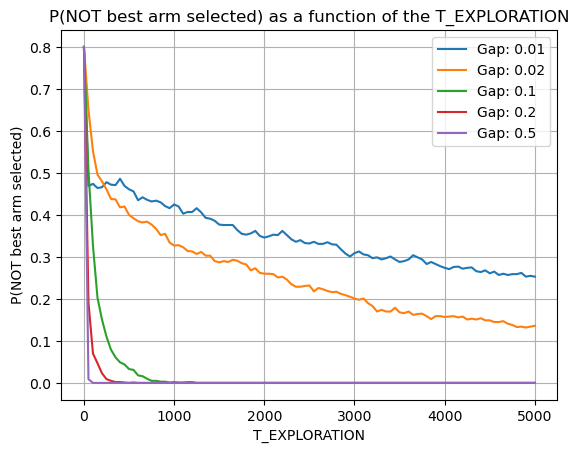

([array([0.2  , 0.531, 0.526, 0.536, 0.534, 0.522, 0.528, 0.529, 0.514,
         0.531, 0.539, 0.544, 0.565, 0.558, 0.564, 0.568, 0.566, 0.57 ,
         0.579, 0.584, 0.575, 0.58 , 0.597, 0.593, 0.593, 0.584, 0.594,
         0.607, 0.609, 0.614, 0.623, 0.624, 0.624, 0.624, 0.636, 0.645,
         0.647, 0.644, 0.638, 0.65 , 0.654, 0.651, 0.647, 0.648, 0.638,
         0.648, 0.658, 0.664, 0.66 , 0.667, 0.668, 0.664, 0.669, 0.669,
         0.665, 0.67 , 0.671, 0.682, 0.692, 0.699, 0.691, 0.687, 0.694,
         0.696, 0.703, 0.701, 0.706, 0.703, 0.699, 0.706, 0.712, 0.71 ,
         0.706, 0.696, 0.701, 0.706, 0.717, 0.712, 0.717, 0.722, 0.726,
         0.729, 0.724, 0.723, 0.728, 0.726, 0.725, 0.734, 0.736, 0.732,
         0.739, 0.735, 0.743, 0.74 , 0.743, 0.741, 0.741, 0.738, 0.747,
         0.745, 0.747]),
  array([0.2  , 0.35 , 0.448, 0.504, 0.52 , 0.539, 0.562, 0.563, 0.582,
         0.58 , 0.6  , 0.608, 0.615, 0.618, 0.616, 0.623, 0.633, 0.648,
         0.645, 0.666, 0.673, 0.672, 0.

In [4]:
# Run the 'plot_explore_then_commit' function for 5 arms, 10000 throws, a reward of 1, and 100 runs

# simple T_EXPLORATION_ARRAY
TEST_EXPLORATION_ARRAY = [0, 1, 2, 5]

plot_explore_then_commit(N_ARMS, T_EXPLORATION_ARRAY, 1, array_probs, 10000, GAPS)

Plot 1: This plot shows the percentage of times the best arm was selected by the Explore Then Commit algorithm as a function of the number of pulls for different arm probability distributions. Each line represents a different distribution with a different gap between the best and second-best arms. As expected, the success rate increases with the number of pulls and the size of the gap, with the larger gaps achieving higher success rates more quickly. This increase looks exponential and this can also be seen in the logarithmic plot below. However, we can see that with a very low difference, the increase may look linear.

Plot 2: This plot shows the same data as Plot 1 but with the x-axis scaled logarithmically. This allows us to better visualize the behavior of the algorithm for very large values of the number of pulls. Also as mentioned above, this could suggest that the relationship between the variables is logarithmic. In other words, as the x variable increases, the y variable increases at a decreasing rate, eventually approaching a maximum value.

Plot 3: We can see the cumulative regret for a gap of 0.01 as a function of the number of pulls. The cumulative regret is the sum of the regret at each time step. The regret is the difference between the best arm and the arm selected at each time step. As expected, the cumulative regret increases linearly with the number of pulls during the exploration phase. This is because the algorithm is exploring for a longer period of time and therefore selecting arms that are not the best arm more often. However, depending on which arm is selected for the commit phase, the cumulative regret may stay constant or increase linearly according to the regret of the arm it selected.

Plot 4: This plot is simply the complement of the first plot in order to have a different look at the data.

### Setup for two arms

Gap: 0.01, Probs: [0.9178996783855977, 0.9278996783855977]
Gap: 0.02, Probs: [0.2895337266645598, 0.26953372666455977]
Gap: 0.1, Probs: [0.48734329836466744, 0.5873432983646675]
Gap: 0.2, Probs: [0.46660032272110874, 0.6666003227211088]
Gap: 0.5, Probs: [0.19266033902459528, 0.6926603390245953]


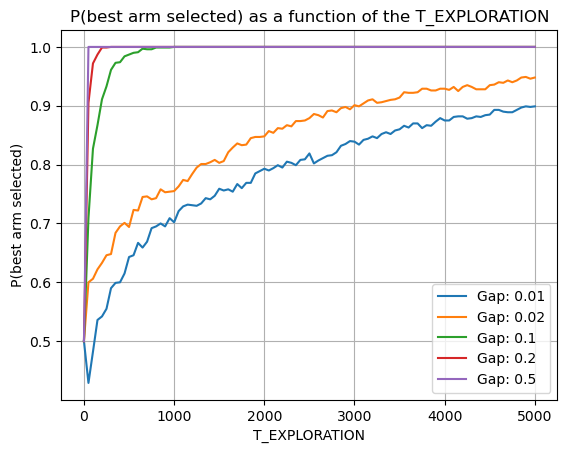

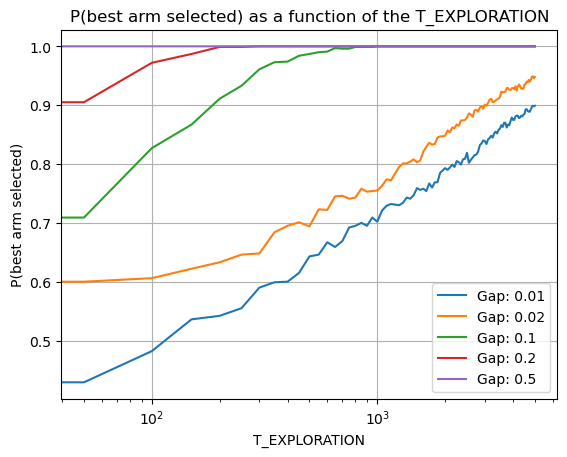

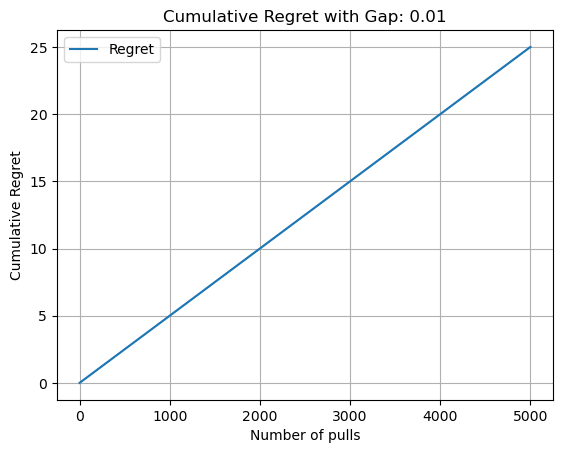

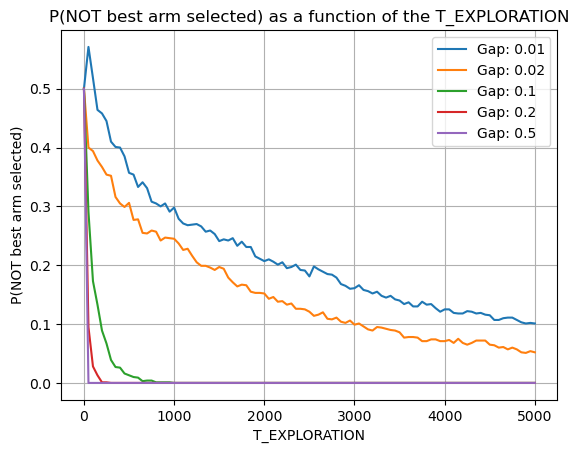

In [7]:
#Initialisation of general parameters for the Explore then Commit strategy of the Multi-Armed Bandit problem

# Total number of arms
N_ARMS = 2

# sub-optimality gap
GAPS = [0.01, 0.02, 0.1, 0.2, 0.5]

# Array of list of arms Probabilities repartitions
array_probs = []

# Probability repartition with sub-optimality gap
for gap in GAPS:

    # probability of success for the second best arm randomly chosen between 0 and 0.5
    p_second_best = np.random.rand() * (1 - gap)

    # probability of success for the best arm
    p_best = p_second_best + gap

    # add the best and second best arm probabilities
    probs = [p_best, p_second_best]

    # shuffle the probabilities and add them to the list
    np.random.shuffle(probs)
    array_probs.append(probs)

plot_explore_then_commit(N_ARMS, T_EXPLORATION_ARRAY, 1, array_probs, 10000, GAPS)


As we can see, changing the number of arms from 5 to 2 does not changes the overall behavior of the algorithm. The success rate increases with the number of pulls and the size of the gap, with the larger gaps achieving higher success rates more quickly. The cumulative regret also increases with the number of pulls and the size of the gap, with larger gaps resulting in higher regret.

## Thompson Sampling

### Setup

In [4]:
#Initialisation of general parameters for the Explore then Commit strategy of the Multi-Armed Bandit problem

# Total number of arms
N_ARMS = 5

# exploration time
MAX_THROW = 5000

# divide T_exploration in 100 values and fill array of exploration times
THROW_ARRAY = np.linspace(0, MAX_THROW, 101, endpoint= True, dtype=int) 

# print the array of exploration times
print("Values of THROW ARRAY: " + str(THROW_ARRAY))


# reward for a win
REWARD = 1

# sub-optimality gap
GAPS = [0.01, 0.02, 0.1, 0.2, 0.5]

# Array of list of arms Probabilities repartitions
array_probs = []

# Probability repartition with sub-optimality gap
for gap in GAPS:

    # probability of success for the second best arm as a random number between 0 and 0.5
    p_second_best = np.random.rand() * (1 - gap)

    # probability of success for the best arm
    p_best = p_second_best + gap

    # calculate the other arm probabilities as random between 0 and p_second_best
    probs = np.random.rand(N_ARMS - 2) * p_second_best

    # add the best and second best arm probabilities
    probs = np.append(probs, [p_best, p_second_best])

    # shuffle the probabilities and add them to the list
    np.random.shuffle(probs)
    array_probs.append(probs)


Values of THROW ARRAY: [   0   50  100  150  200  250  300  350  400  450  500  550  600  650
  700  750  800  850  900  950 1000 1050 1100 1150 1200 1250 1300 1350
 1400 1450 1500 1550 1600 1650 1700 1750 1800 1850 1900 1950 2000 2050
 2100 2150 2200 2250 2300 2350 2400 2450 2500 2550 2600 2650 2700 2750
 2800 2850 2900 2950 3000 3050 3100 3150 3200 3250 3300 3350 3400 3450
 3500 3550 3600 3650 3700 3750 3800 3850 3900 3950 4000 4050 4100 4150
 4200 4250 4300 4350 4400 4450 4500 4550 4600 4650 4700 4750 4800 4850
 4900 4950 5000]


Gap: 0.01, Probs: [0.53608986 0.94255483 0.64131708 0.93255483 0.0462313 ]
Gap: 0.02, Probs: [0.01282173 0.00296579 0.01166789 0.03282173 0.01254032]
Gap: 0.1, Probs: [0.04881196 0.04929716 0.14929716 0.01083581 0.01833339]
Gap: 0.2, Probs: [0.17691217 0.22126405 0.47154064 0.01233382 0.27154064]
Gap: 0.5, Probs: [0.89108971 0.15335046 0.39108971 0.22833617 0.23203536]


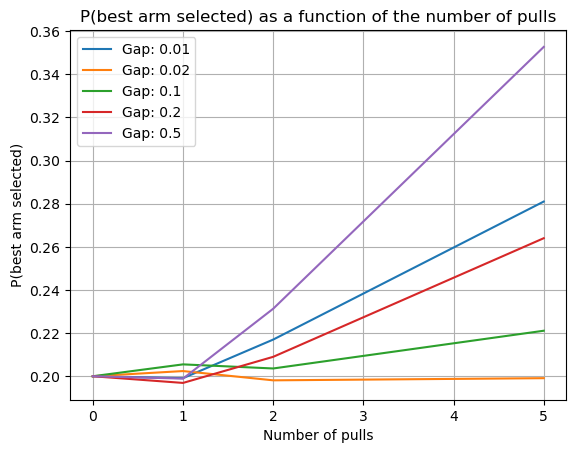

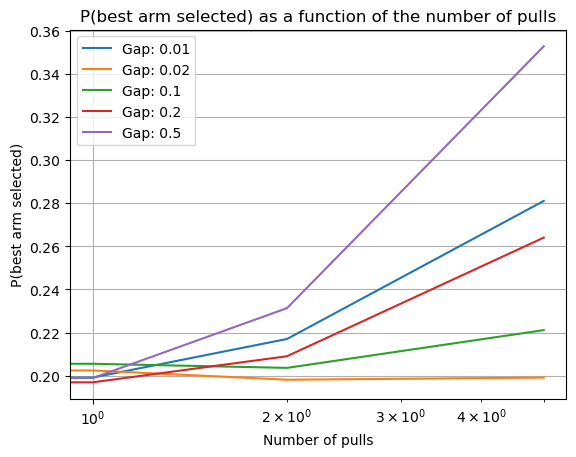

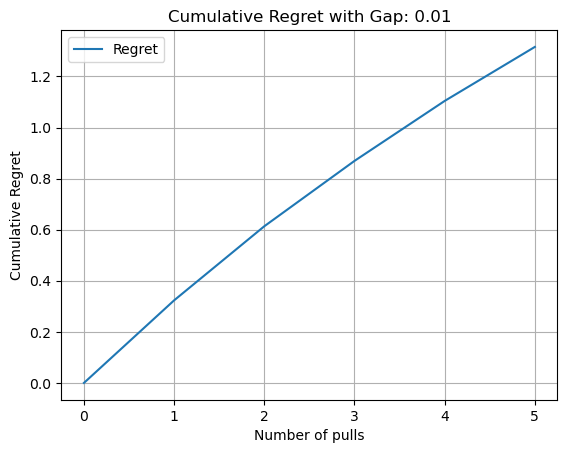

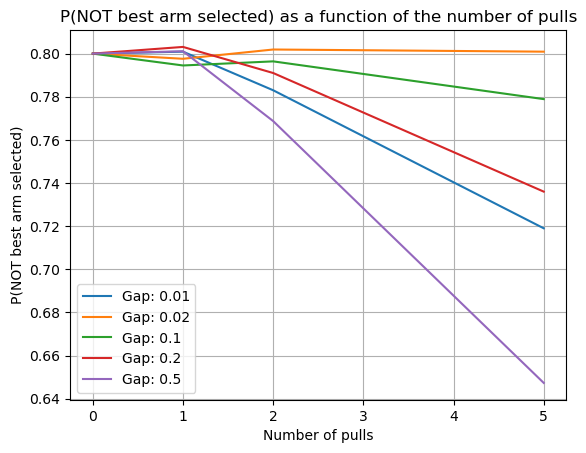

([array([0.2   , 0.1991, 0.217 , 0.281 ]),
  array([0.2   , 0.2024, 0.1981, 0.1991]),
  array([0.2   , 0.2055, 0.2036, 0.2211]),
  array([0.2   , 0.1969, 0.209 , 0.264 ]),
  array([0.2   , 0.1989, 0.2313, 0.3527])],
 [array([0.8   , 0.8009, 0.783 , 0.719 ]),
  array([0.8   , 0.7976, 0.8019, 0.8009]),
  array([0.8   , 0.7945, 0.7964, 0.7789]),
  array([0.8   , 0.8031, 0.791 , 0.736 ]),
  array([0.8   , 0.8011, 0.7687, 0.6473])],
 [array([0.        , 0.3233719 , 0.61342067, 0.86930609, 1.10406678,
         1.31557231]),
  array([0.        , 0.01820639, 0.03651525, 0.0548185 , 0.07288463,
         0.09115554]),
  array([0.        , 0.09317019, 0.18676456, 0.27877194, 0.37066639,
         0.46186021]),
  array([0.        , 0.24174196, 0.47674929, 0.70466166, 0.92553456,
         1.13939862]),
  array([0.        , 0.51293945, 1.00368115, 1.46630019, 1.90038442,
         2.30804341])])

In [11]:
# Run the 'plot_explore_then_commit' function for 5 arms, 10000 throws, a reward of 1, and 100 runs

# simple T_EXPLORATION_ARRAY
TEST_ARRAY = [0, 1, 2, 5]

plot_thompson_sampling_beta(N_ARMS, TEST_ARRAY, array_probs, 10000, GAPS)

Plot 1: This plot shows the percentage of times the best arm was selected by the Thompson Sampling algorithm as a function of the number of pulls for different arm probability distributions. Each line represents a different distribution with a different gap between the best and second-best arms. As expected, the success rate increases with the number of pulls and the size of the gap, with the larger gaps achieving higher success rates more quickly. This increase looks exponential and this can also be seen in the logarithmic plot below.

Plot 2: This plot shows the same data as Plot 1 but with the x-axis scaled logarithmically. This allows us to better visualize the behavior of the algorithm for very large values of the number of pulls. Interestingly, we can see that for small gaps, the success rate continues to increase with the number of pulls even after the algorithm has already converged to the best arm. This suggests that for small gaps, the algorithm may be exploring more than necessary. Also as mentioned above, this could suggest that the relationship between the variables is logarithmic. In other words, as the x variable increases, the y variable increases at a decreasing rate, eventually approaching a maximum value.

Plot 3: This plot shows the same data as the pervious plots but with a log log scale. There are a few differences with the log-x scaled plots which may suggests that the increase may actually be something else than exponential. The relationship between the variables on both axes may be a power-law.

Plot 4: This plot is simply the complement of the first plot in order to have a different look at the data.